## KNN Imputation Analysis

**Description**

K-Nearest Neighbors (KNN) imputation is a technique for handling missing data by using the values of the nearest neighbors to fill in the missing entries. The algorithm identifies the K most similar observations based on other features in the dataset and imputes the missing value using the average (for numerical variables) or mode (for categorical variables) of these neighbors. KNN imputation works well in datasets with similar patterns across observations, leveraging the relationships between variables to make accurate imputations.

**Advantages**

KNN imputation can produce more accurate results than simpler methods like mean or median imputation, as it considers the relationship between variables when imputing missing values. This approach tends to preserve the underlying patterns in the data, maintaining the structure and distribution of the dataset. 

It is versatile and can be used for both numerical and categorical data, making it suitable for a wide range of applications. Additionally, KNN imputation can be more robust to missing data in datasets with complex patterns and interactions between variables.

**Disadvantages**

KNN imputation can be computationally expensive, especially when dealing with large datasets, as it requires calculating the distances between all pairs of observations. The choice of K (the number of nearest neighbors) can significantly impact the imputation quality; too small a K value may lead to noisy imputations, while too large a K can blur the imputation and reduce accuracy. 

Additionally, KNN imputation assumes that the relationships between variables are well-defined and stable, which may not be the case in datasets with highly non-linear patterns or irregular missing data. Furthermore, the method is sensitive to the scale of the data, so feature scaling may be required for optimal performance.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train.shape, X_test.shape

((425, 23), (183, 23))

In [14]:
imputer = KNNImputer(
    n_neighbors=5,
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)

imputer.fit(X_train)

KNNImputer(weights='distance')

In [15]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

X_train_t = pd.DataFrame(train_t, columns=X_train.columns)
X_test_t = pd.DataFrame(test_t, columns=X_test.columns)

X_train_t.head()

,RID,Gender,Ageatscreening,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,362.0,1.0,70.5479,24.0,0.09000,177.587786,0.45,213.60,42.73,615.39,...,257.59,0.43,224.580000,29.39,640.73,2.96,57.73,2.53,1278.0,2448.0
1,869.0,1.0,83.0521,26.0,0.08000,165.750000,0.51,179.00,43.23,550.26,...,217.25,0.51,217.430000,28.37,652.46,2.72,2072.42,2.61,1027.0,2349.0
2,1257.0,0.0,85.0849,20.0,0.15000,147.660000,0.57,180.78,31.82,575.46,...,287.61,0.39,233.070000,29.95,644.68,2.95,-467.36,2.45,1819.0,3631.0
3,384.0,0.0,79.8740,29.0,0.12000,184.280000,0.58,215.56,37.63,677.96,...,204.92,0.52,222.737605,29.07,654.06,2.98,1421.62,3.48,2002.0,3400.0
4,2.0,0.0,74.4548,28.0,0.08679,217.010000,0.53,228.40,29.23,696.61,...,217.01,0.53,228.400000,29.23,696.61,2.83,-507.05,3.36,1945.0,4210.0


In [16]:
dataframes = [
    X_train_t, X_test_t, 
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


### Check for normal distribution and skewness change 

In [17]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

def check_normality(dataset):
    
    results = {}

    for column in dataset.columns:  
        stat, p = shapiro(dataset[column].dropna())
        skewness = skew(dataset[column].dropna())
        kurt = kurtosis(dataset[column].dropna())
        results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

In [18]:
X_train_norm = check_normality(X_train)
X_test_norm = check_normality(X_test)

X_train_norm_knn = check_normality(X_train_t)
X_test_norm_knn = check_normality(X_test_t)

In [19]:
normal_train_df = pd.DataFrame({"p-value": X_train_norm["p-value"],
                                "Skewness": X_train_norm["Skewness"],
                                "Kurtosis": X_train_norm["Kurtosis"],
                                "X_train_norm": X_train_norm["Normal"],
                                
                                "p-value_knn": X_train_norm_knn["p-value"],
                                "Skewness_knn": X_train_norm_knn["Skewness"],
                                "Kurtosis_knn": X_train_norm_knn["Kurtosis"],
                                "X_train_knn": X_train_norm_knn["Normal"],
})

normal_test_df = pd.DataFrame({"p-value": X_test_norm["p-value"],
                                "Skewness": X_test_norm["Skewness"],
                                "Kurtosis": X_test_norm["Kurtosis"],
                                "X_test_norm": X_test_norm["Normal"],
                                
                                "p-value_knn": X_test_norm_knn["p-value"],
                                "Skewness_knn": X_test_norm_knn["Skewness"],
                                "Kurtosis_knn": X_test_norm_knn["Kurtosis"],
                               "X_test_knn": X_test_norm_knn["Normal"]
})

In [20]:
normal_train_df

,Statistic,p-value,Skewness,Kurtosis,X_train_norm,Statistic_knn,p-value_knn,Skewness_knn,Kurtosis_knn,X_train_knn
RID,0.960571,0.0,-0.191996,-1.042352,False,0.960571,0.0,-0.191996,-1.042352,False
Gender,0.629481,0.0,0.280362,-1.921397,False,0.629481,0.0,0.280362,-1.921397,False
Ageatscreening,0.98636,0.000507,-0.352696,0.074891,False,0.98636,0.000507,-0.352696,0.074891,False
MMSE0m,0.899325,0.0,-0.86101,0.089239,False,0.899001,0.0,-0.862968,0.093699,False
HipsASMbaseline,0.962064,0.0,0.527045,-0.234448,False,0.962817,0.0,0.544969,-0.177316,False
HipsContrastbaseline,0.991863,0.022984,0.21891,-0.294576,False,0.992195,0.025302,0.22168,-0.270642,False
HipsCorelationbaseline,0.973015,0.000001,-0.465003,-0.239129,False,0.973261,0.0,-0.430104,-0.360186,False
HipsVariancebaseline,0.93952,0.0,-0.707282,-0.345891,False,0.940159,0.0,-0.682202,-0.416703,False
HipsSumAveragebaseline,0.992093,0.023528,-0.087851,-0.465718,False,0.992093,0.023528,-0.087851,-0.465718,False
HipsSumVariancebaseline,0.93146,0.0,-0.775533,-0.258937,False,0.931261,0.0,-0.768062,-0.286718,False


In [22]:
print("Total normal distribution count for X_train_norm")
print(normal_train_df["X_train_norm"].value_counts())

print("Total normal distribution count for X_train_knn")
print(normal_train_df["X_train_knn"].value_counts())

Total normal distribution count for X_train_norm
X_train_norm
False    20
True      3
Name: count, dtype: int64
Total normal distribution count for X_train_knn
X_train_knn
False    20
True      3
Name: count, dtype: int64


In [23]:
normal_test_df

,Statistic,p-value,Skewness,Kurtosis,X_test_norm,Statistic_knn,p-value_knn,Skewness_knn,Kurtosis_knn,X_test_knn
RID,0.960508,0.000051,-0.016388,-1.13125,False,0.960508,0.000051,-0.016388,-1.13125,False
Gender,0.636327,0.0,-0.032791,-1.998925,False,0.636327,0.0,-0.032791,-1.998925,False
Ageatscreening,0.980514,0.011678,-0.433128,-0.042661,False,0.980514,0.011678,-0.433128,-0.042661,False
MMSE0m,0.917092,0.0,-0.833102,0.252238,False,0.917092,0.0,-0.833102,0.252238,False
HipsASMbaseline,0.969407,0.000648,0.426523,-0.261149,False,0.969057,0.000439,0.453889,-0.228637,False
HipsContrastbaseline,0.993728,0.641145,-0.093392,-0.423827,True,0.994068,0.675977,-0.067421,-0.428541,True
HipsCorelationbaseline,0.966959,0.000316,-0.54832,-0.180166,False,0.966184,0.000208,-0.515405,-0.328636,False
HipsVariancebaseline,0.941051,0.000001,-0.751652,-0.130158,False,0.942953,0.000001,-0.716873,-0.233971,False
HipsSumAveragebaseline,0.984341,0.039599,-0.17071,-0.360171,False,0.984466,0.040203,-0.158885,-0.370714,False
HipsSumVariancebaseline,0.942657,0.000001,-0.758671,-0.07304,False,0.944454,0.000002,-0.710023,-0.237297,False


In [24]:
print("\nTotal normal distribution count for X_test_norm")
print(normal_test_df["X_test_norm"].value_counts())

print("\nTotal normal distribution count for X_test_knn")
print(normal_test_df["X_test_knn"].value_counts())


Total normal distribution count for X_test_norm
X_test_norm
False    13
True     10
Name: count, dtype: int64

Total normal distribution count for X_test_knn
X_test_knn
False    13
True     10
Name: count, dtype: int64


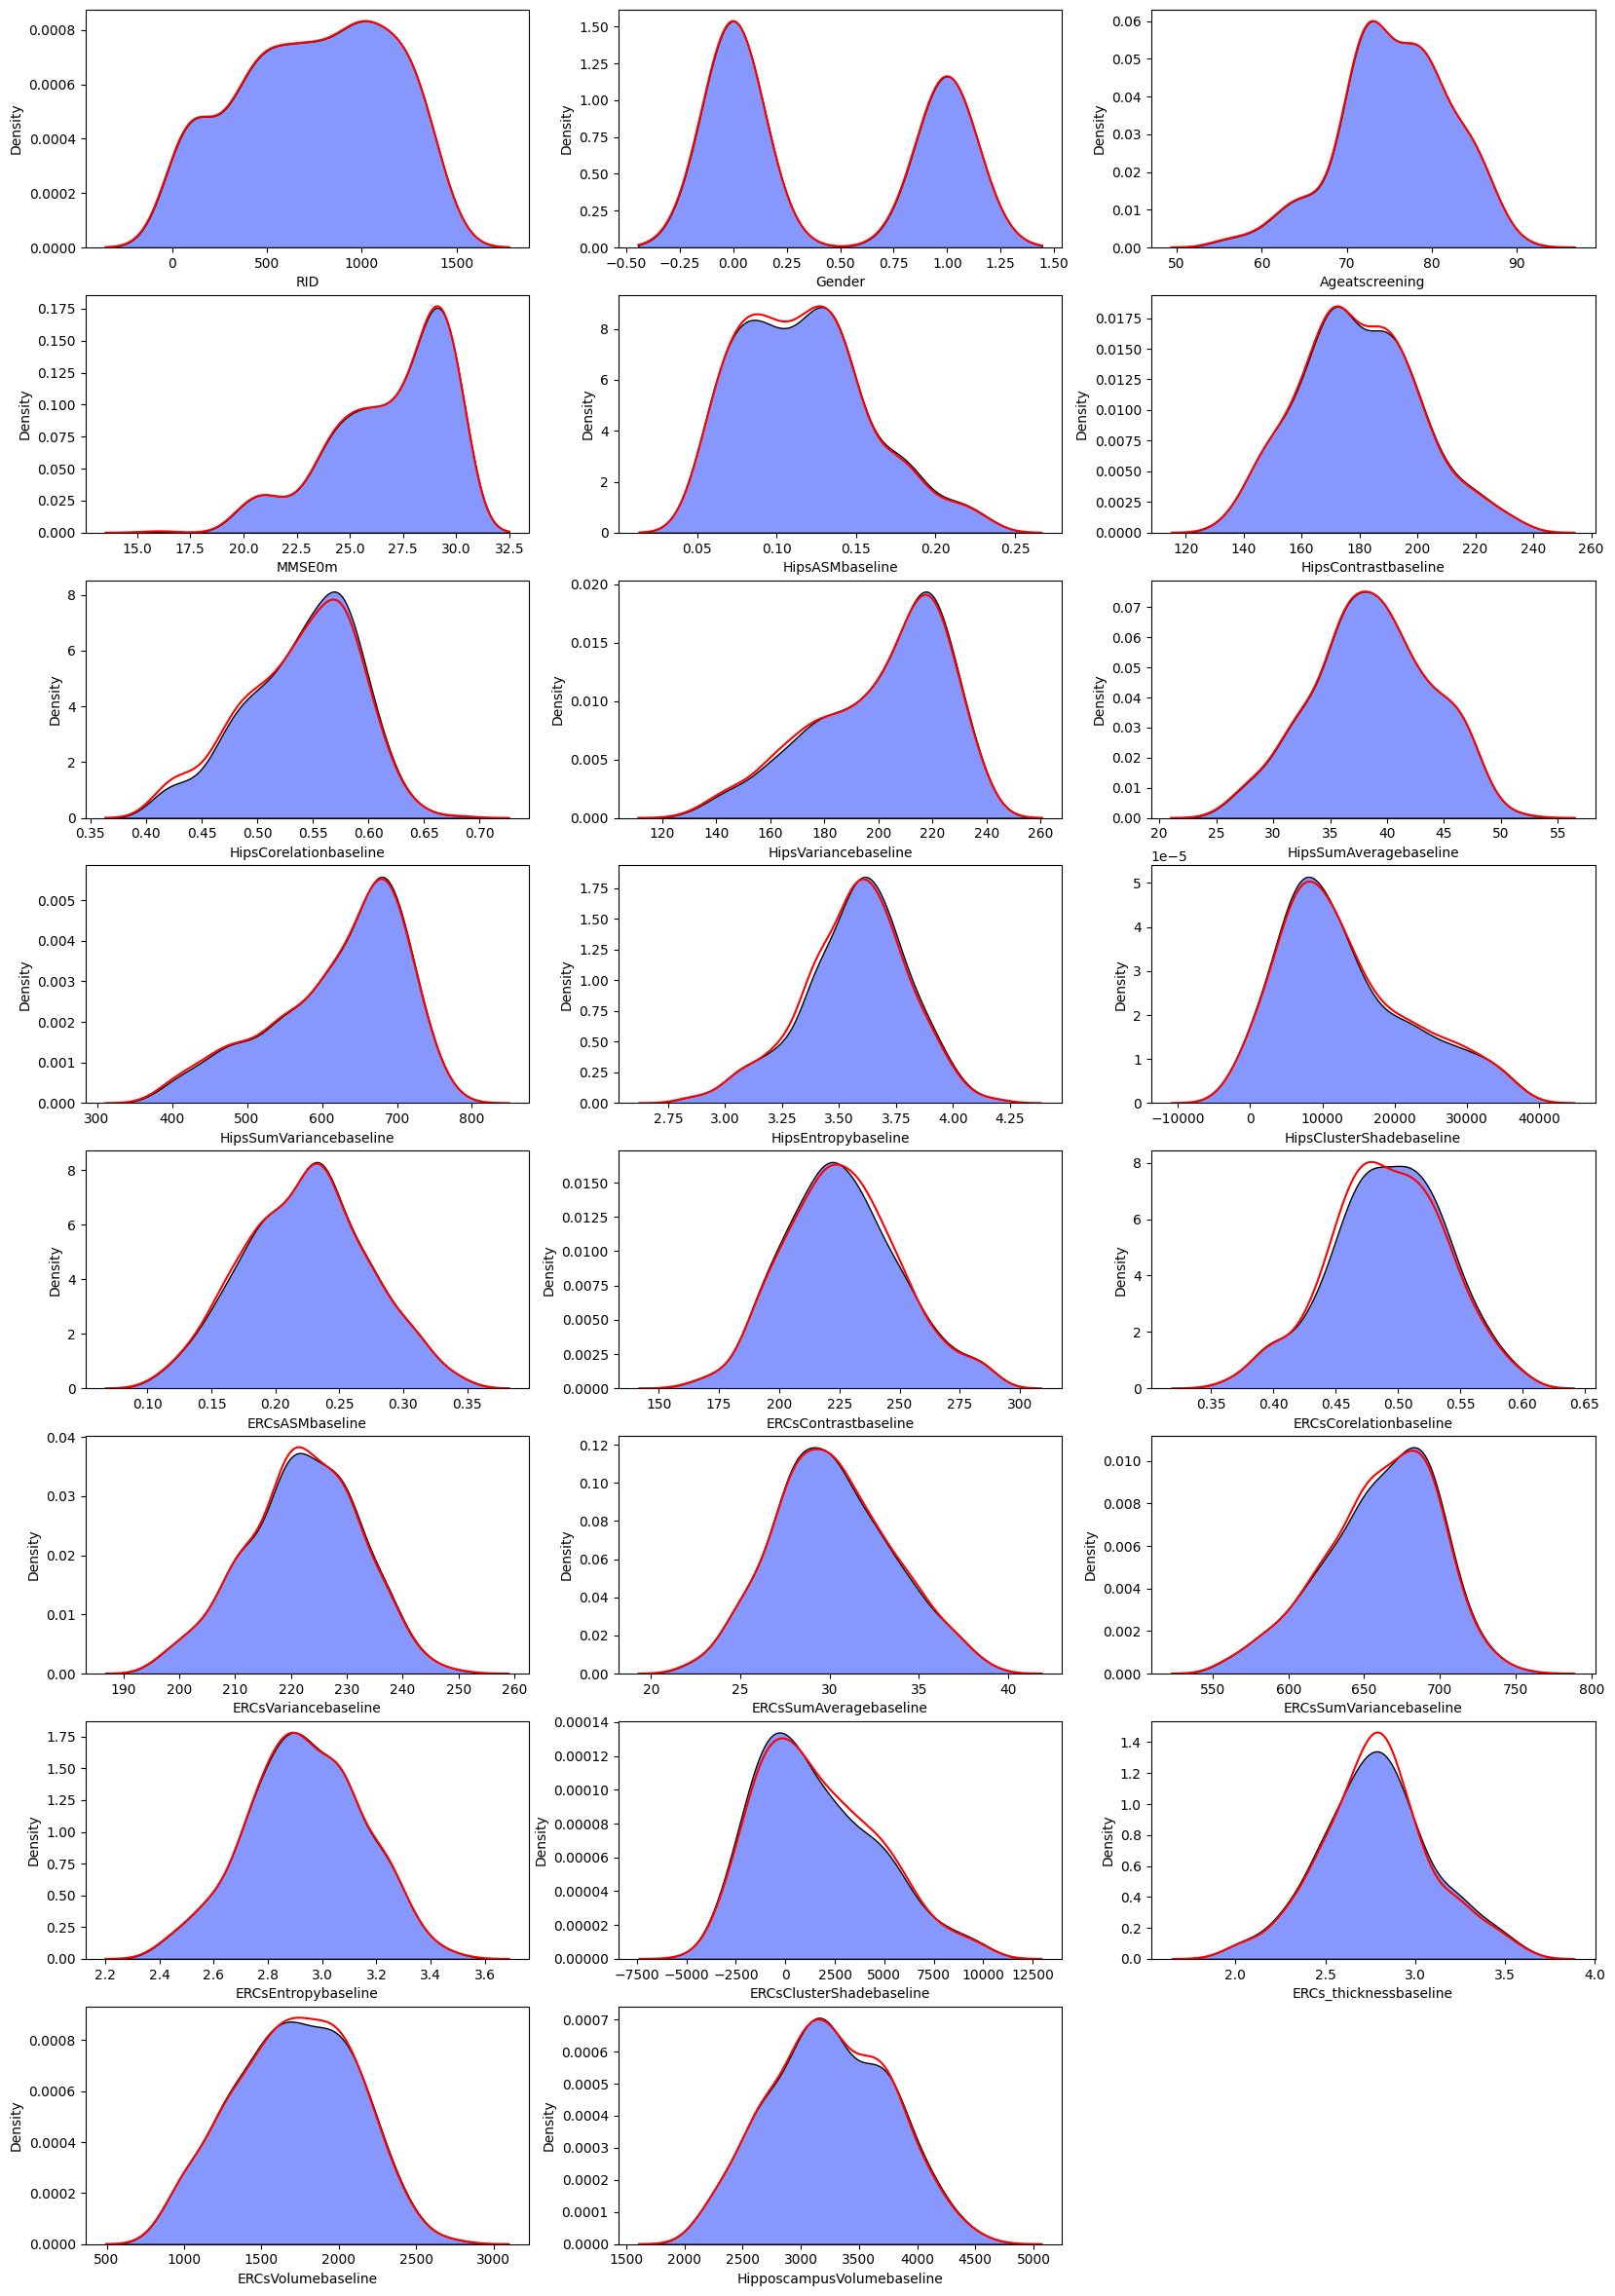

In [25]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

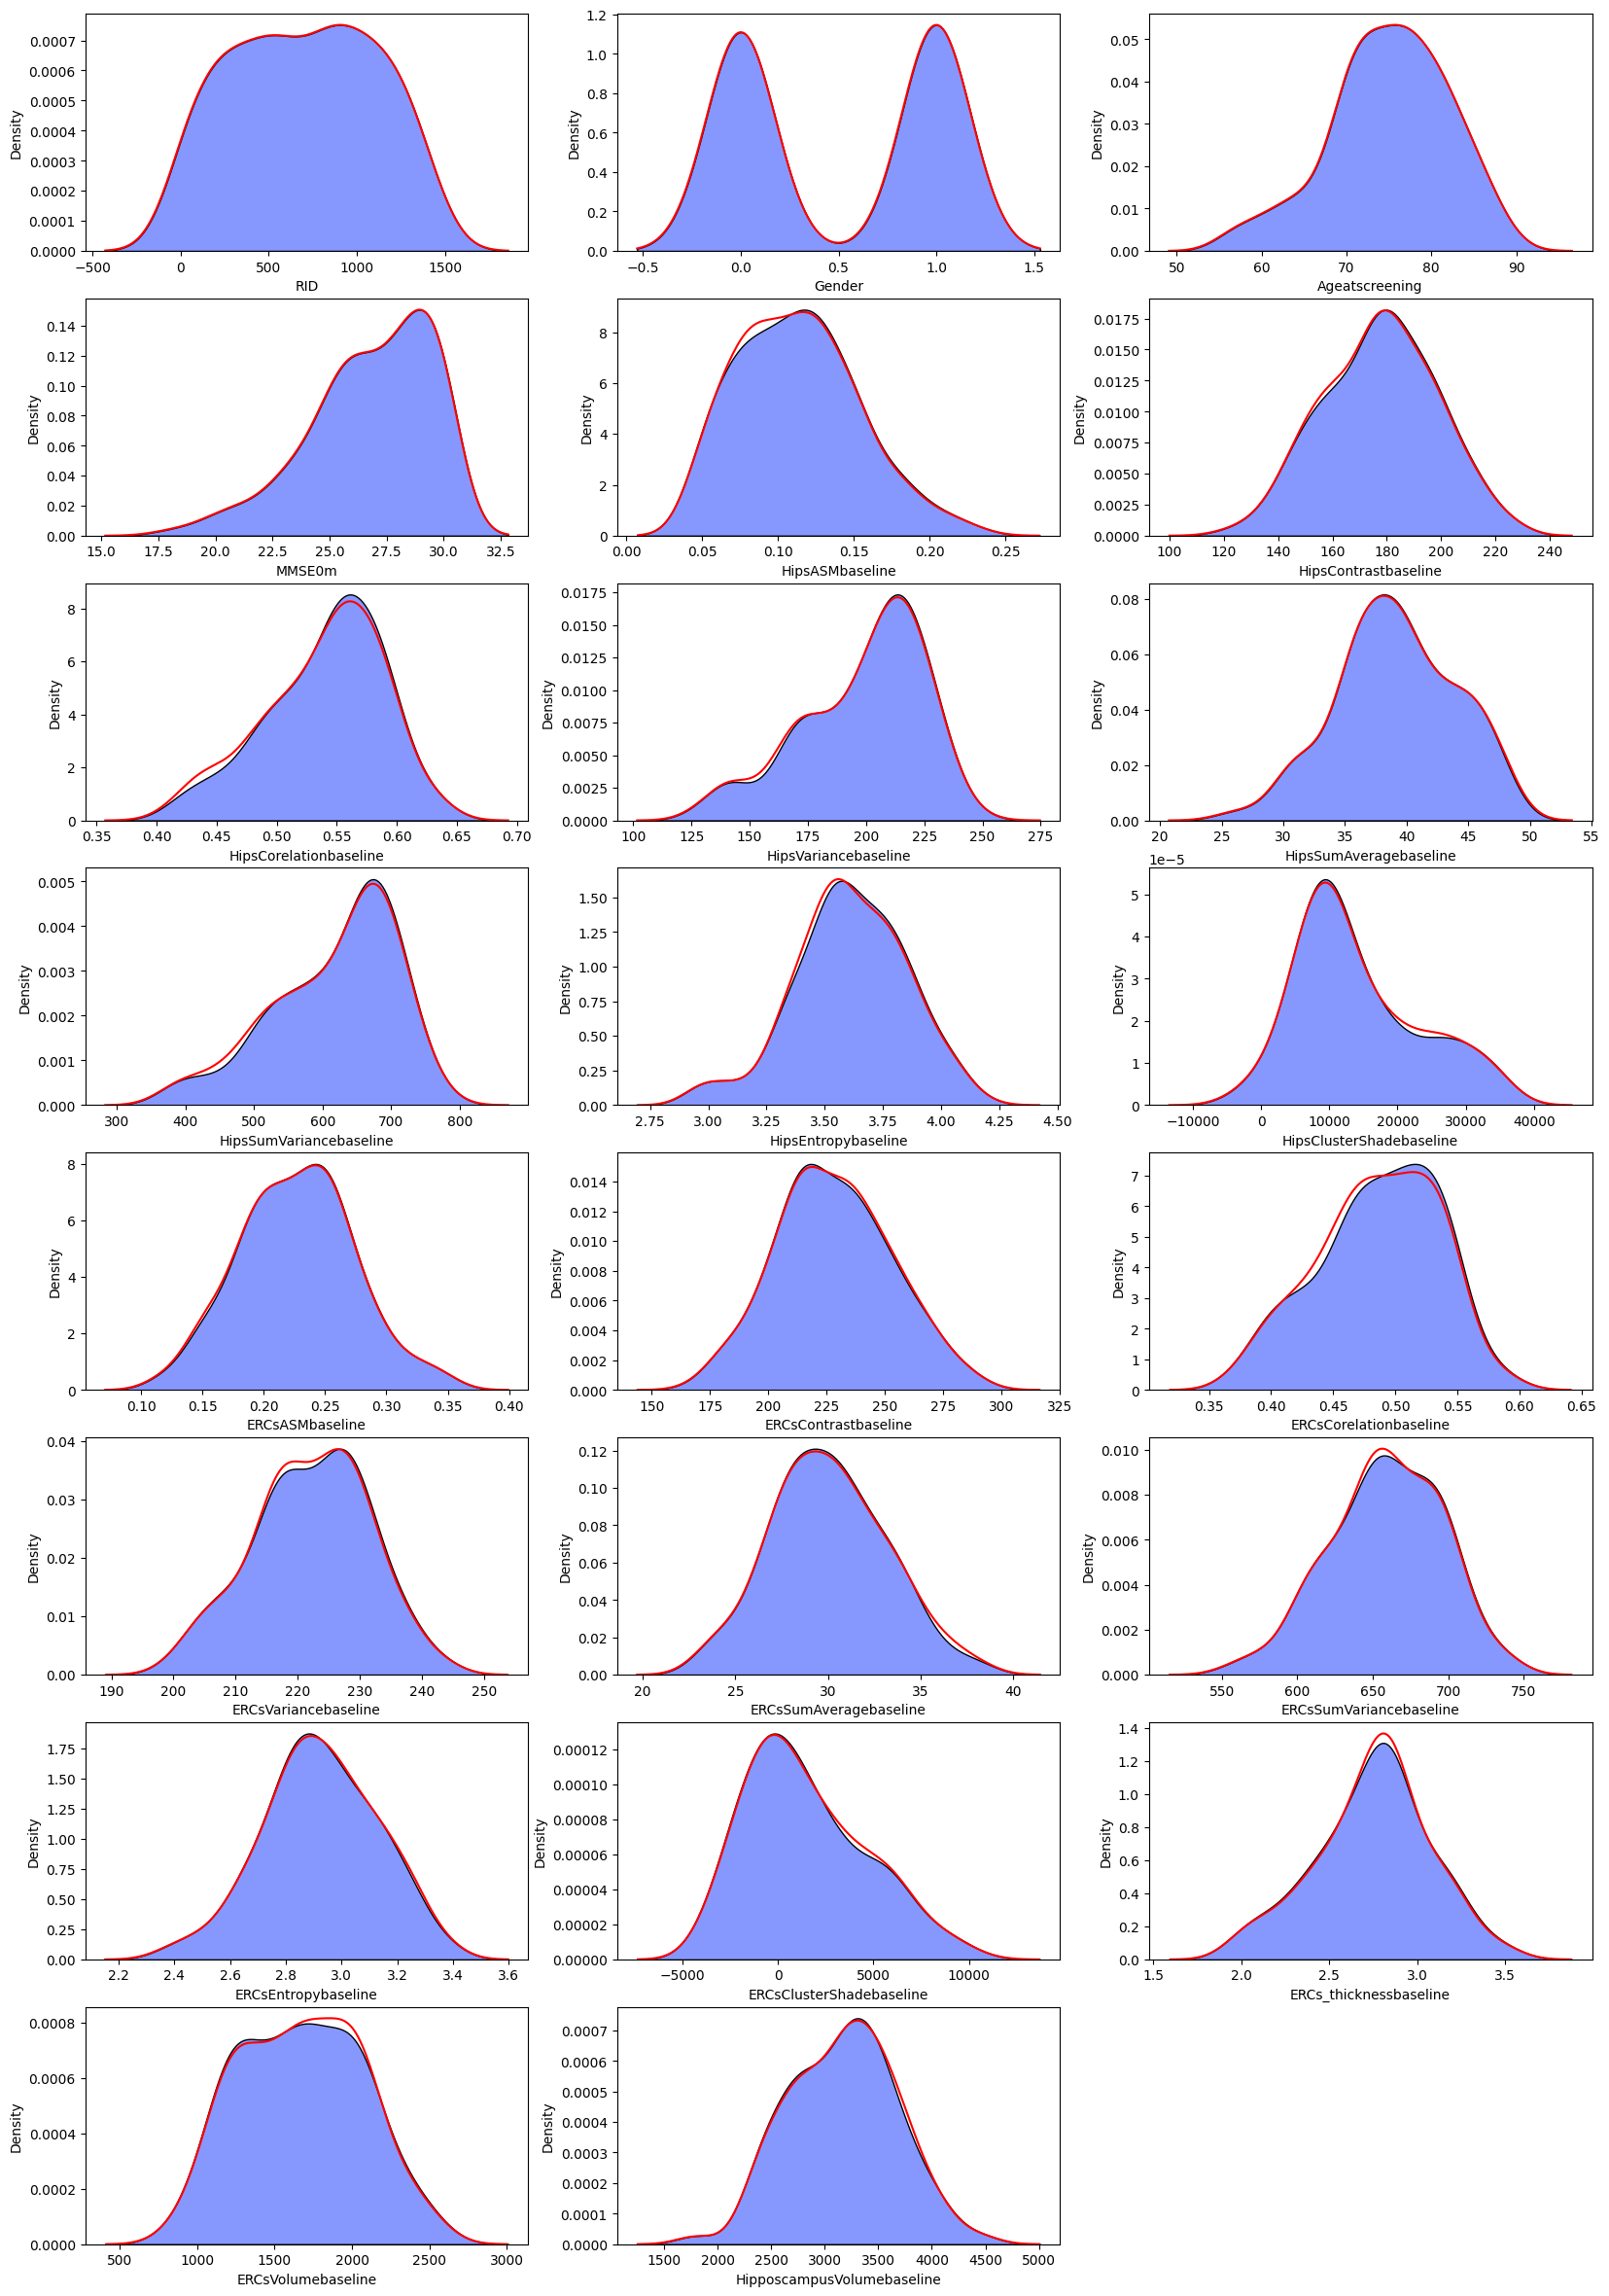

In [26]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

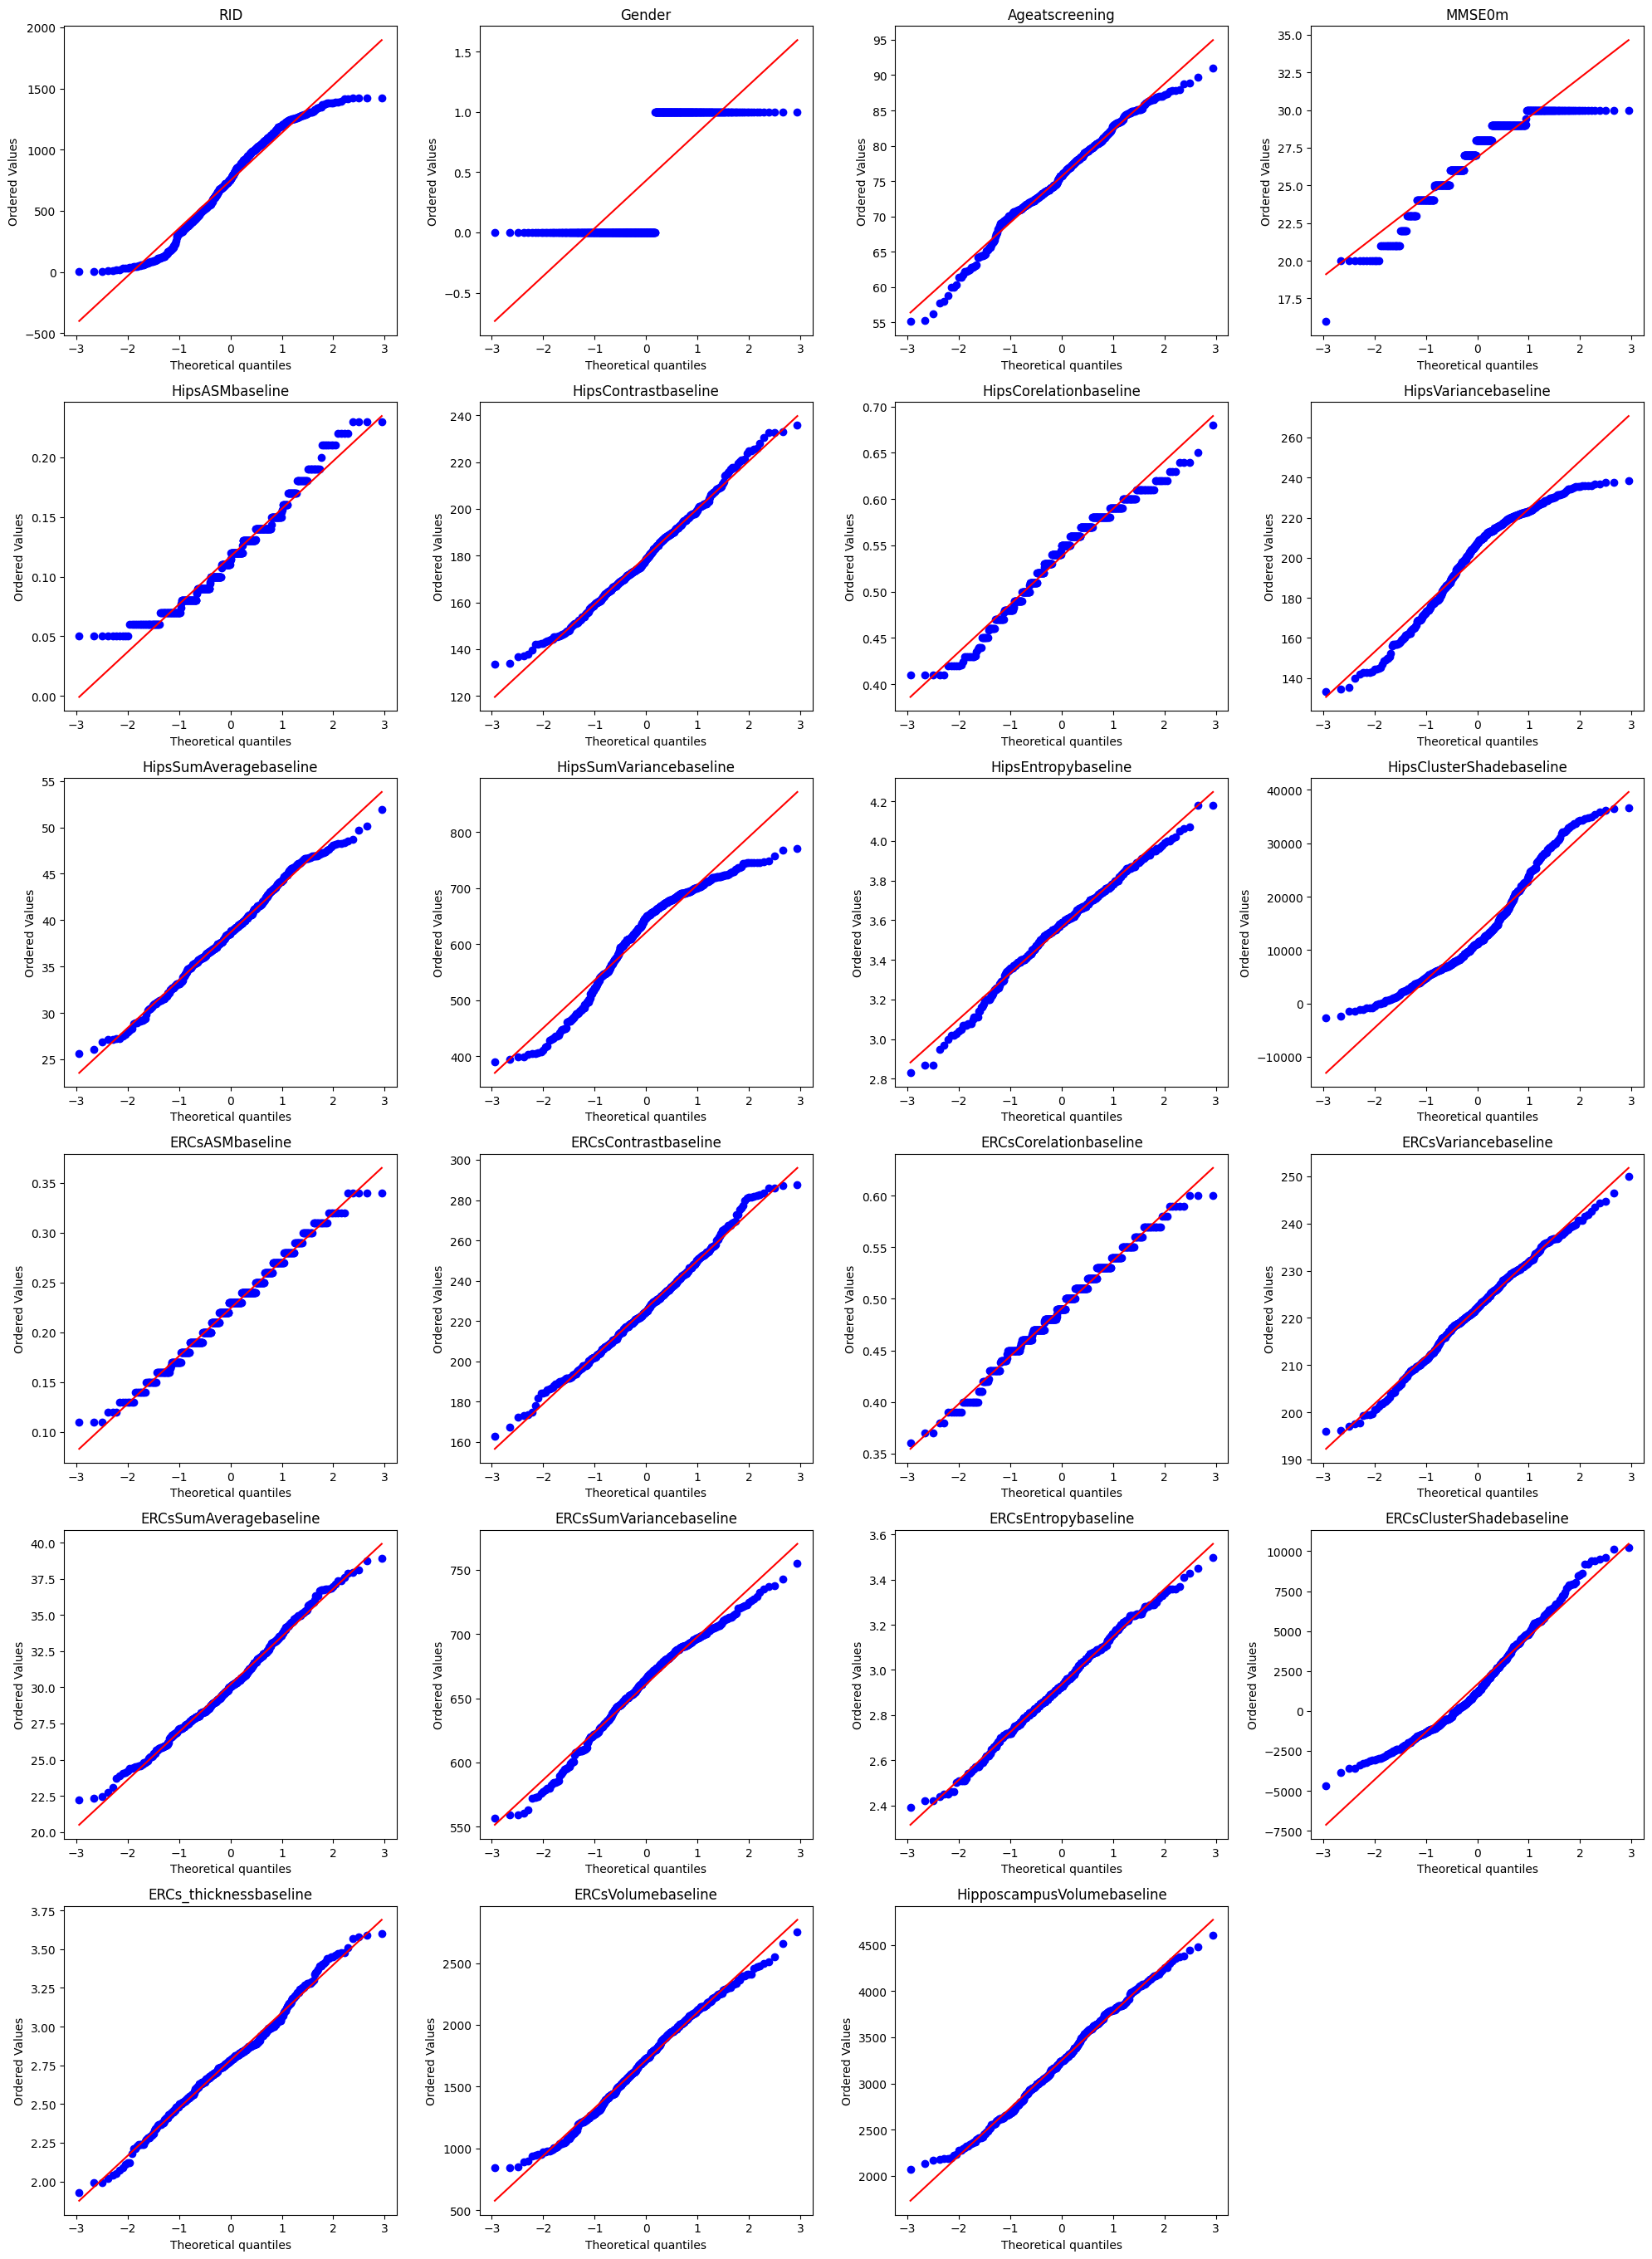

In [27]:
from scipy import stats

# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_train_t.columns)):
    plt.subplot(10, 4, i + 1)
    
    stats.probplot(X_train_t[X_train_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_train_t.columns[i])

plt.tight_layout()

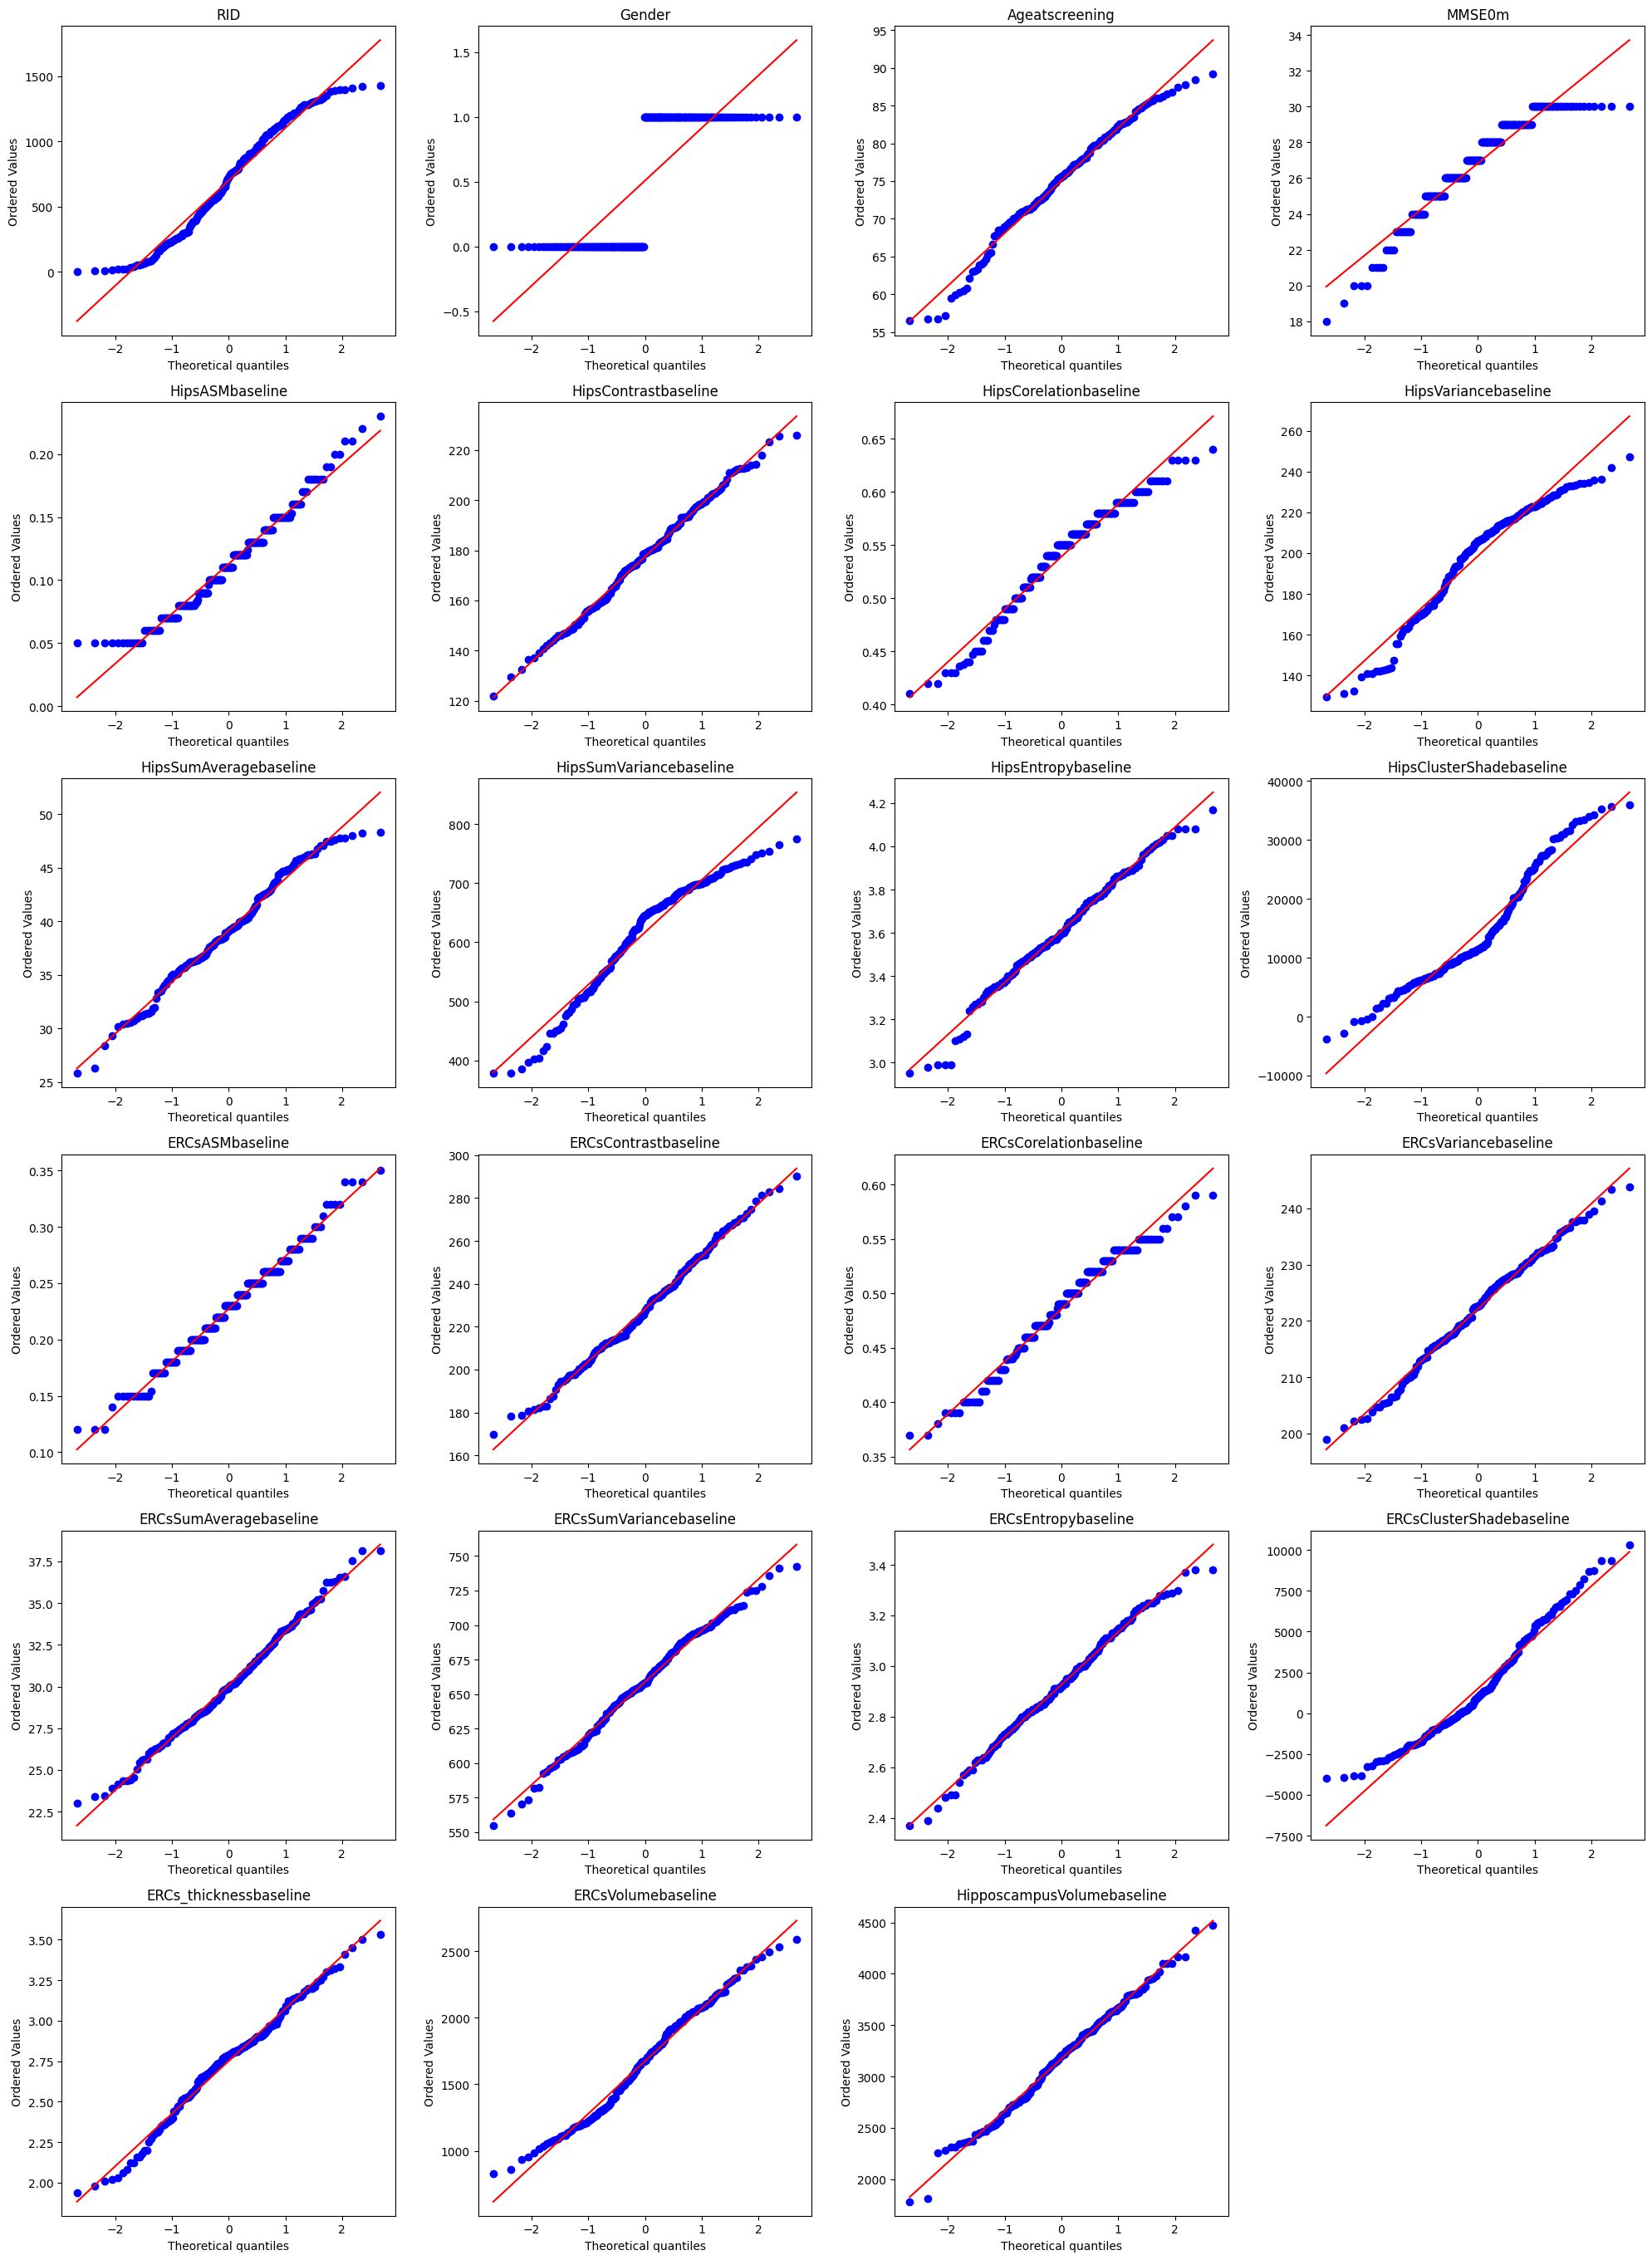

In [28]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(X_test_t.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(X_test_t[X_test_t.columns[i]], 
                   dist='norm', plot=plt)
    plt.title(X_test_t.columns[i])

plt.tight_layout()

### Check for variance change

In [33]:
variance_train_df = pd.DataFrame({"X_train_std": X_train.var(),
              "X_train_knn std": X_train_t.var(),
            }
)

variance_train_df["Changed_train"] = (variance_train_df.nunique(axis=1) > 1)

variance_test_df = pd.DataFrame({"X_test": X_test.var(),
              "X_test_knn std": X_test_t.var(),
            }
)

variance_test_df["Changed_test"] = (variance_test_df.nunique(axis=1) > 1)

variance_df_report = pd.concat([variance_train_df, variance_test_df], axis=1)
variance_df_report

,X_train_std,X_train_knn std,Changed_train,X_test,X_test_knn std,Changed_test
RID,1.563815e+05,1.563815e+05,False,1.654556e+05,1.654556e+05,False
Gender,2.457603e-01,2.457603e-01,False,2.513061e-01,2.513061e-01,False
Ageatscreening,4.307941e+01,4.307941e+01,False,4.862086e+01,4.862086e+01,False
MMSE0m,7.689551e+00,7.670980e+00,True,7.112112e+00,7.112112e+00,False
HipsASMbaseline,1.686332e-03,1.641774e-03,True,1.611935e-03,1.581072e-03,True
HipsContrastbaseline,4.227328e+02,4.162230e+02,True,4.375496e+02,4.347505e+02,True
HipsCorelationbaseline,2.584648e-03,2.703572e-03,True,2.353091e-03,2.477933e-03,True
HipsVariancebaseline,5.847527e+02,5.964204e+02,True,6.732886e+02,6.839231e+02,True
HipsSumAveragebaseline,2.642004e+01,2.642004e+01,False,2.277794e+01,2.311564e+01,True
HipsSumVariancebaseline,7.585556e+03,7.714773e+03,True,7.896207e+03,8.141793e+03,True


In [35]:
print(variance_df_report["Changed_train"].value_counts())
print(variance_df_report["Changed_test"].value_counts())

Changed_train
True     19
False     4
Name: count, dtype: int64
Changed_test
True     19
False     4
Name: count, dtype: int64


In [37]:
variance_df_check = variance_df_report.drop(["Changed_train", "Changed_test"], axis=1)
variance_df_check

,X_train_std,X_train_knn std,X_test,X_test_knn std
RID,1.563815e+05,1.563815e+05,1.654556e+05,1.654556e+05
Gender,2.457603e-01,2.457603e-01,2.513061e-01,2.513061e-01
Ageatscreening,4.307941e+01,4.307941e+01,4.862086e+01,4.862086e+01
MMSE0m,7.689551e+00,7.670980e+00,7.112112e+00,7.112112e+00
HipsASMbaseline,1.686332e-03,1.641774e-03,1.611935e-03,1.581072e-03
HipsContrastbaseline,4.227328e+02,4.162230e+02,4.375496e+02,4.347505e+02
HipsCorelationbaseline,2.584648e-03,2.703572e-03,2.353091e-03,2.477933e-03
HipsVariancebaseline,5.847527e+02,5.964204e+02,6.732886e+02,6.839231e+02
HipsSumAveragebaseline,2.642004e+01,2.642004e+01,2.277794e+01,2.311564e+01
HipsSumVariancebaseline,7.585556e+03,7.714773e+03,7.896207e+03,8.141793e+03


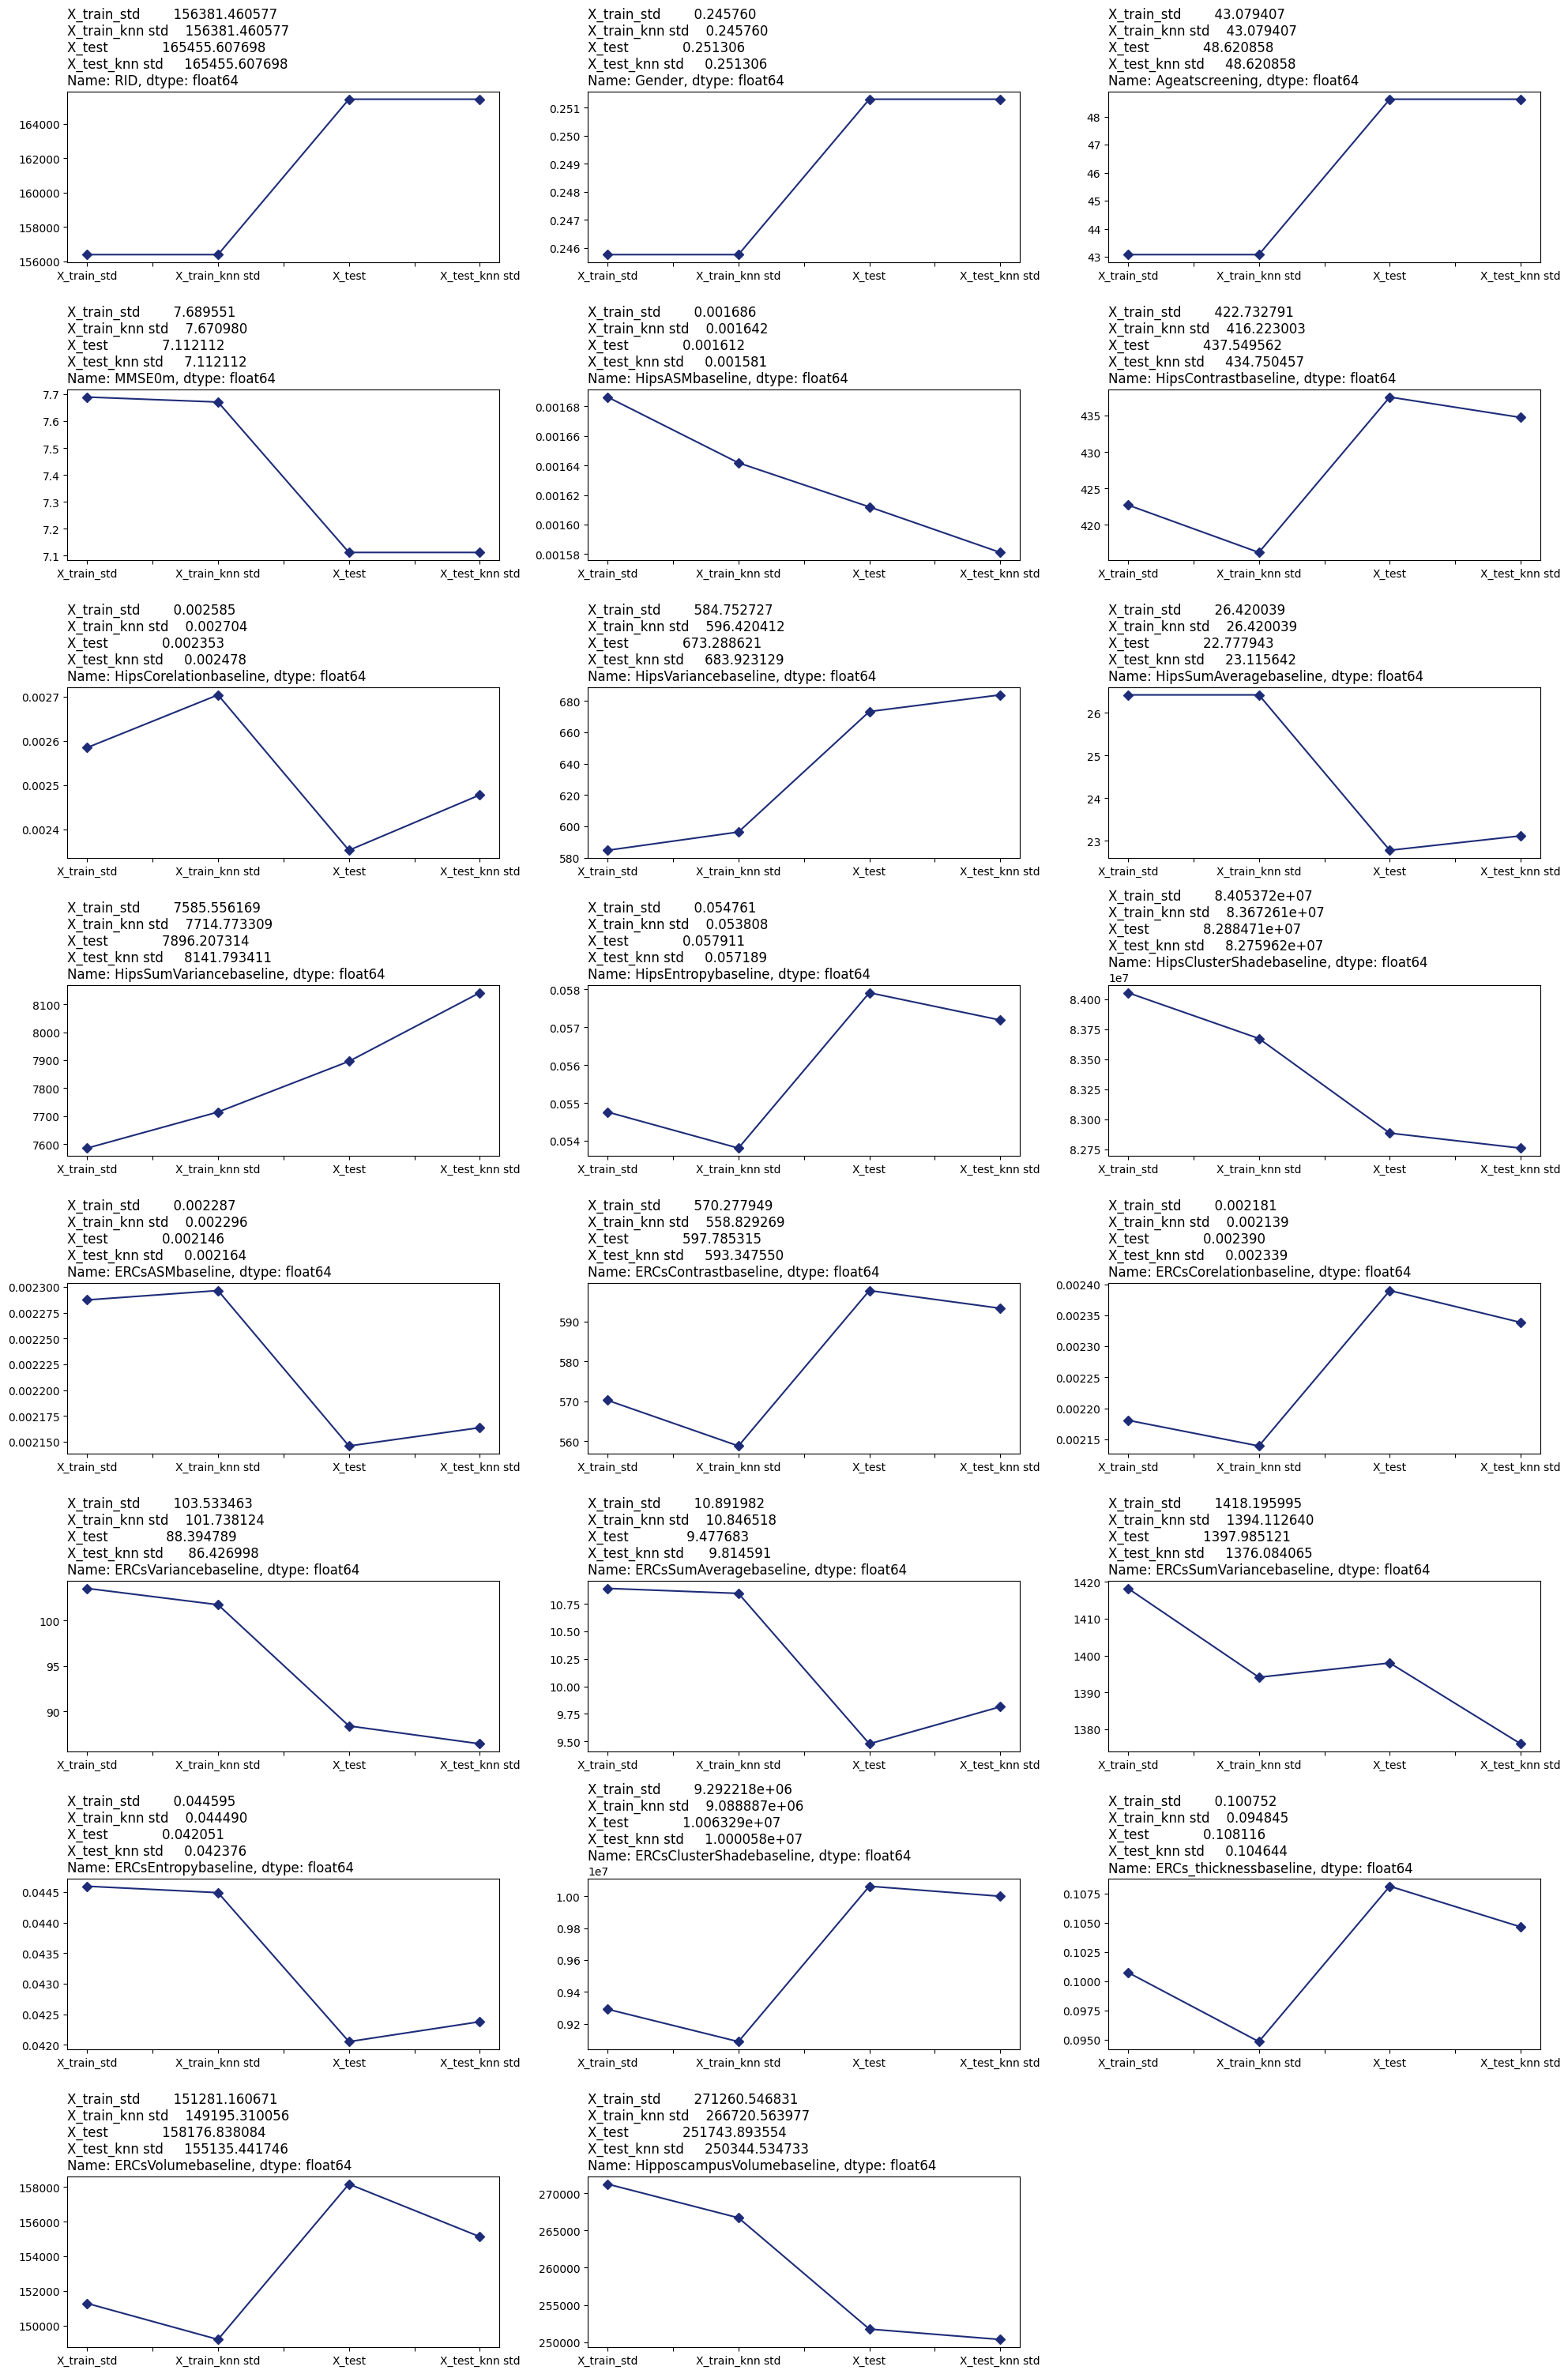

In [ ]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_df_check)):
    plt.subplot(12,3,i+1)
    variance_df_check.iloc[i].plot(kind="line",
                                   color="#1e2c78",
                                   marker="D",
                                   label=i,
    )
    plt.title(variance_df_check.iloc[i], loc="left")

plt.tight_layout()